In [1]:
%pip install seaborn

In [2]:
"1. Data Collection"

'1. Data Collection'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Matplotlib is building the font cache; this may take a moment.


In [4]:
dataset = pd.read_csv("data/StudentsPerformance.csv")
dataset.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# print dataset dimensionality
def get_dimensionality(data):        
    print(f"#samples = {data.shape[0]}")
    print(f"#features = {data.shape[1]}")

In [6]:
get_dimensionality(dataset)

#samples = 1000
#features = 8


In [7]:
# manage metadata
def get_metadata(data):
    metadata = {}
    metadata["numerical"] = data.select_dtypes(include = ["float64", "int64"]).columns.tolist()
    metadata["categorical"] = data.select_dtypes(include = ["object"]).columns.tolist()
    print("Numerical features: ", metadata["numerical"])
    print("Categorical features: ", metadata["categorical"])
    
    return metadata

In [8]:
get_metadata(dataset)

Numerical features:  ['math score', 'reading score', 'writing score']
Categorical features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


{'numerical': ['math score', 'reading score', 'writing score'],
 'categorical': ['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course']}

In [9]:
"2. Filter missing values"

'2. Filter missing values'

In [10]:
def filter_missing(data):
    sbn.displot(
        data = data.isna().melt(value_name = "missing"),
        y = "variable",
        hue = "missing",
        multiple = "fill",
        aspect = 1.5
    )

    plt.show()
    cleaned_data = data.dropna()

    return cleaned_data

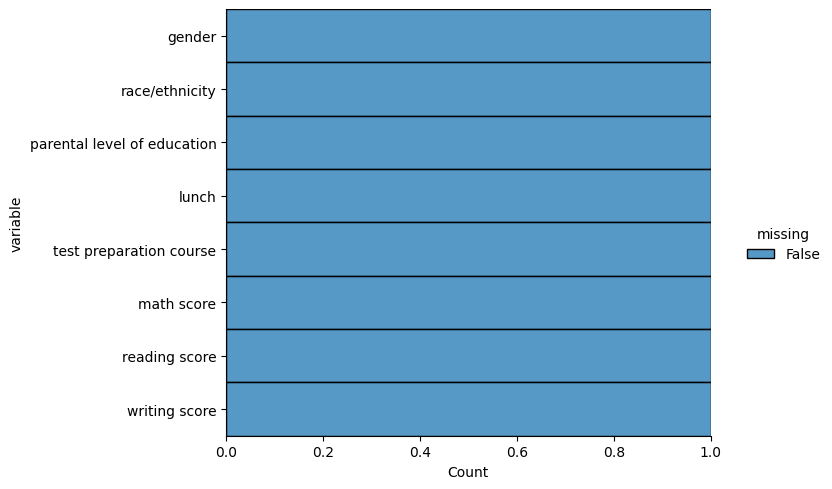

In [11]:
dataset = filter_missing(dataset)

In [12]:
print("New dimensionality after filtering")
get_dimensionality(dataset)

New dimensionality after filtering
#samples = 1000
#features = 8


In [13]:
"3.Data Visualization for numerical variables"

'3.Data Visualization for numerical variables'

In [45]:
## Histogram
variables = ["math score", "reading score", "writing score"]

In [46]:
def hist_frequencies(data, variables, bins = 10):
    ncol_plots = 2
    nrow_plots = (len(variables) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "orange"]

    for i, col in enumerate(variables):
        sbn.histplot(data = data[col], ax = ax[i], color = colors[i], bins = bins)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
        ax[i].set_title(f"Histogram of Frequencies for {col}", fontsize = 14)
        
    plt.tight_layout()
    plt.show()

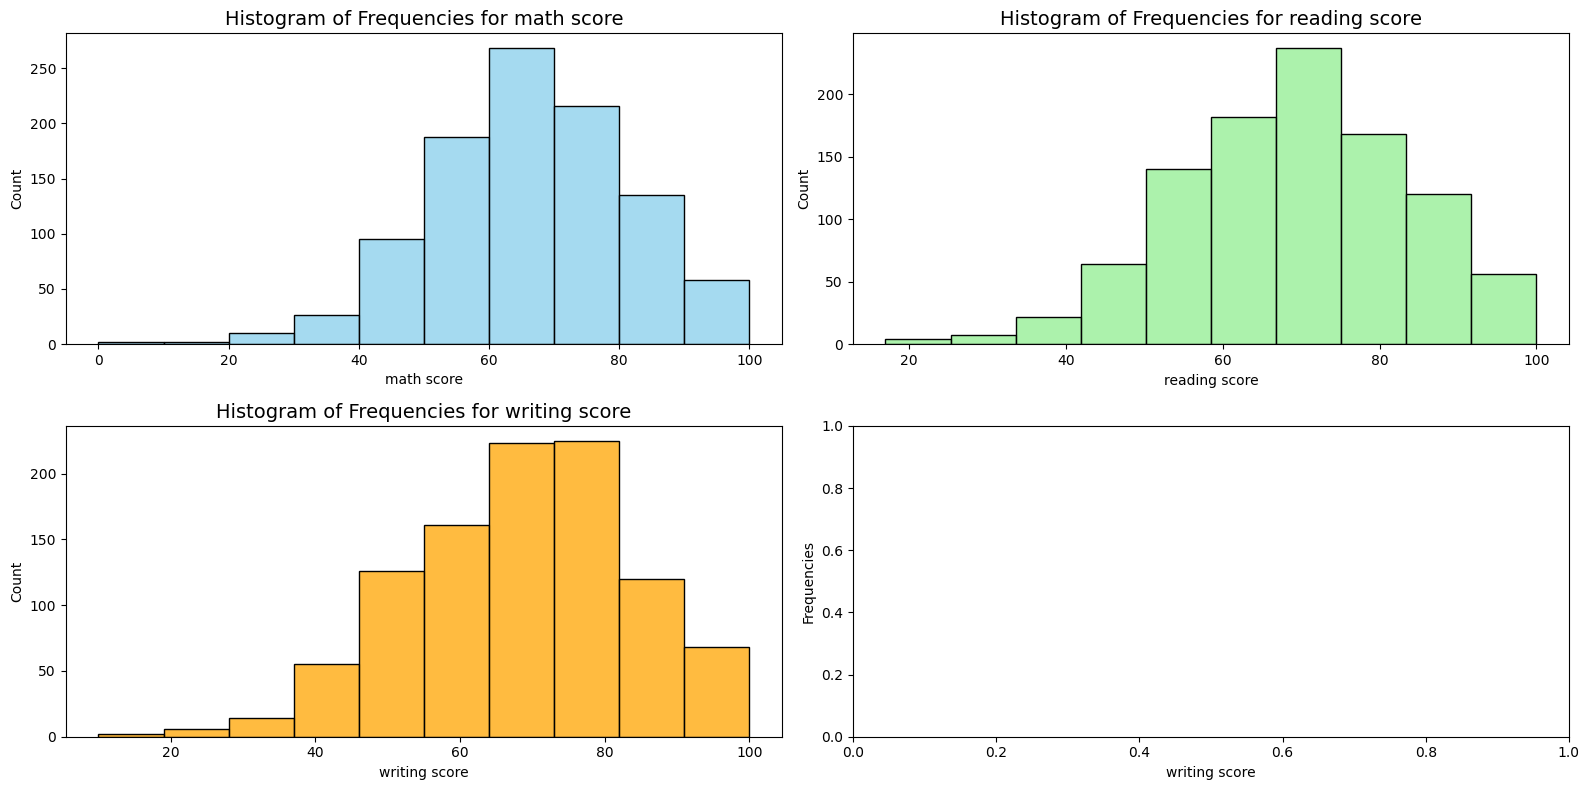

In [47]:
hist_frequencies(dataset, variables)

In [56]:
## Bivariate charts
def bivariate_plots(data, x_var, y_var):
    ncol_plots = 2
    nrow_plots = (len(x_var) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (32, 30 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "orange"]

    for i, col in enumerate(x_var):
        ax[i] = sbn.barplot(data = data, x = col, y = y_var, ax = ax[i], color = colors[i], errorbar = None)
        ax[i].bar_label(ax[i].containers[0], fontsize = 10)
        ax[i].set_title(f"{y_var} vs {col}", fontsize = 14)
        plt.xlabel(col)
        plt.ylabel(y_var)
        
    plt.tight_layout()
    plt.show()

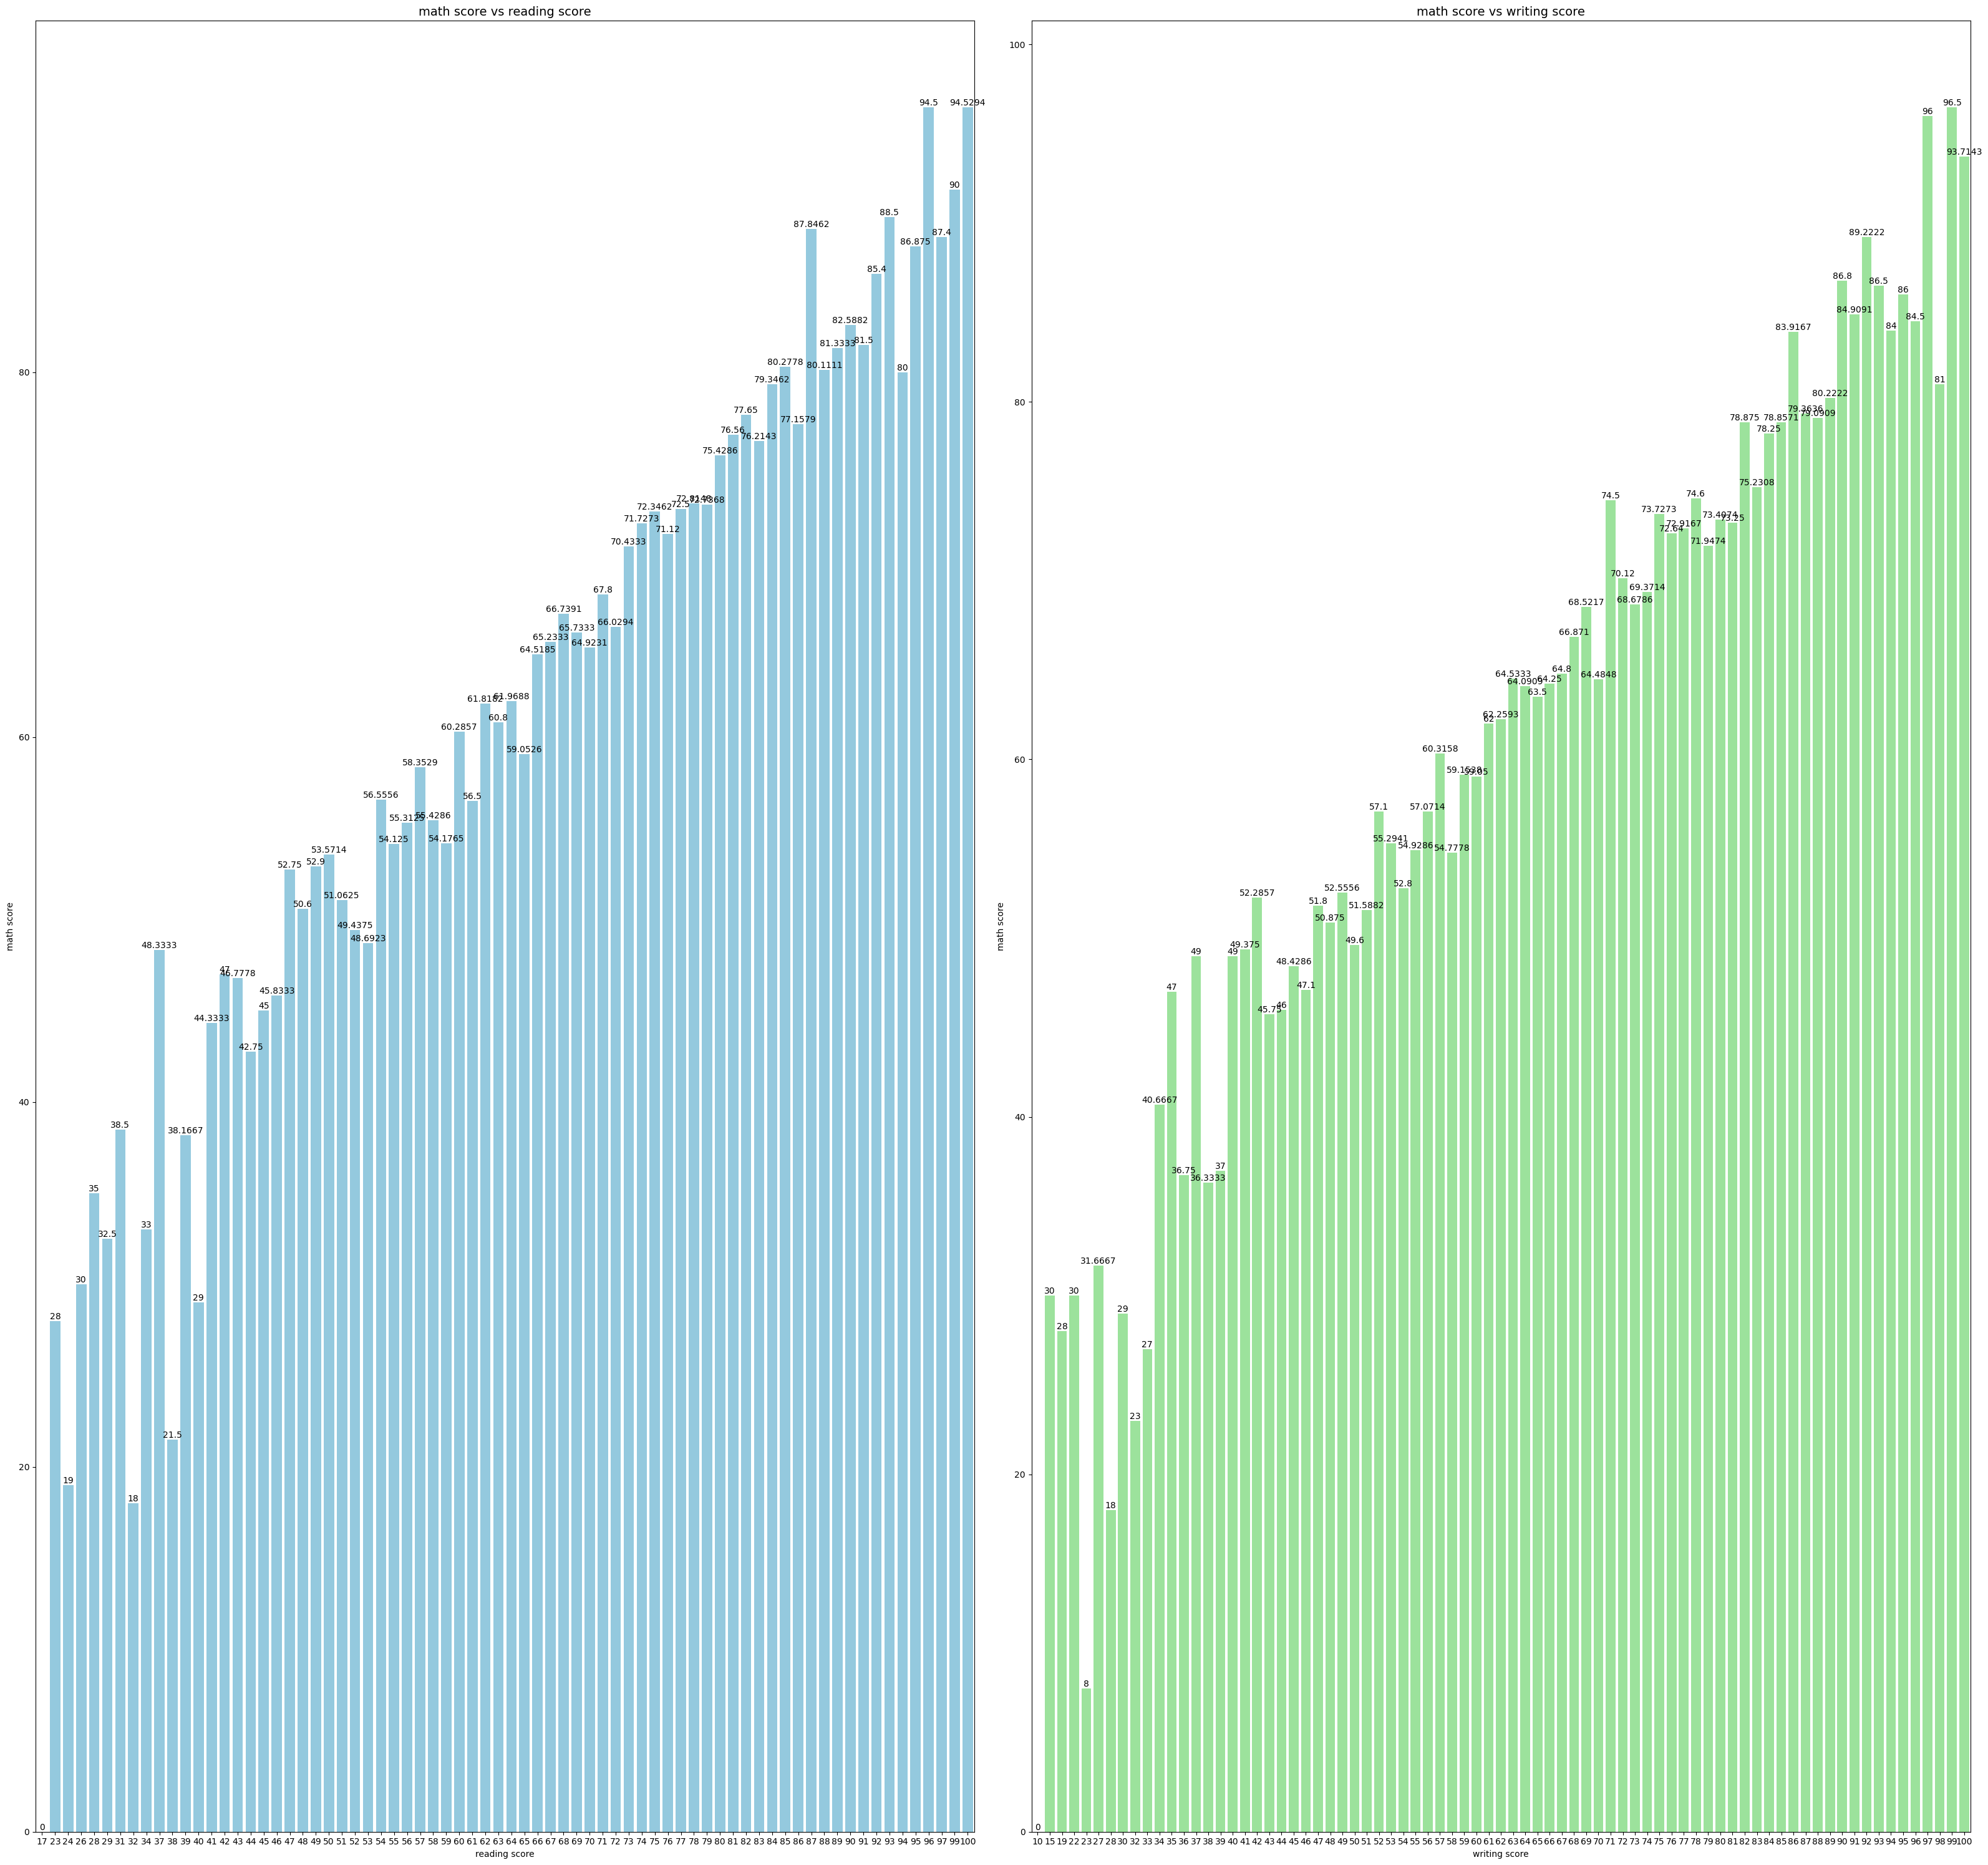

In [57]:
# Bivariants for Income
bivariate_plots(data = dataset, x_var = ["reading score", "writing score"], y_var = "math score")

In [19]:
## Box Plot
def get_boxplot(data, x_var):
    ncol_plots = 2
    nrow_plots = (len(x_var) + ncol_plots - 1) // ncol_plots
    fig, ax = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    ax = ax.flatten()
    colors = ["skyblue", "lightgreen", "orange"]

    for i, col in enumerate(x_var):
        sbn.boxplot(data = data, x = col, ax = ax[i], color = colors[i])
        ax[i].set_title(f"Box Plot for {col}", fontsize = 14)
        ax[i].set_xlabel(col)
        
    plt.tight_layout()
    plt.show()

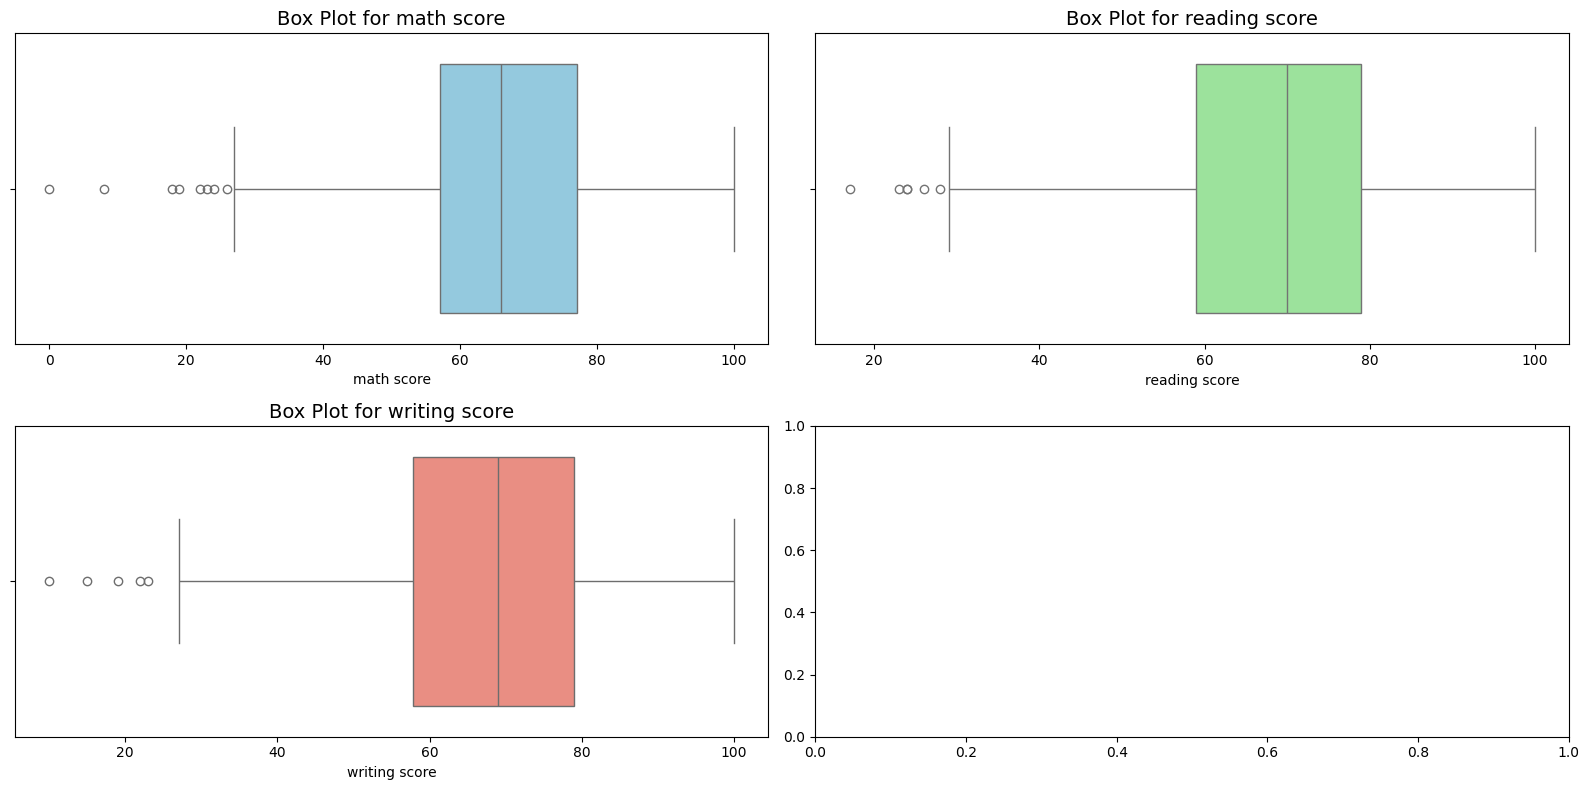

In [58]:
get_boxplot(data = dataset, x_var = ["math score", "reading score", "writing score"])

In [59]:
## Statistical Metrics
variables = ["math score", "reading score", "writing score"]
dataset[variables].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [60]:
variables = ["math score", "reading score", "writing score"]

In [61]:
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

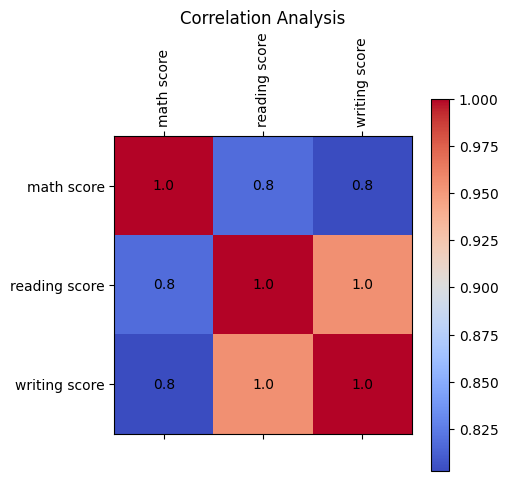

In [62]:
plot_correlation(dataset, variables)

In [25]:
"4. Data Visualization for categorical variables"

'4. Data Visualization for categorical variables'

In [63]:
variables = ['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course']
variables

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [64]:
for col in variables:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** gender ******
gender
female    518
male      482
Name: count, dtype: int64

***** race/ethnicity ******
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

***** parental level of education ******
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

***** lunch ******
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

***** test preparation course ******
test preparation course
none         642
completed    358
Name: count, dtype: int64


In [65]:
# Bar chart for absolute frequencies
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()    
    ax = sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    ax.bar_label(ax.containers[0], fontsize = 10, fmt = "%d")
    plt.title("Statistical analysis by " + col)
    plt.show()

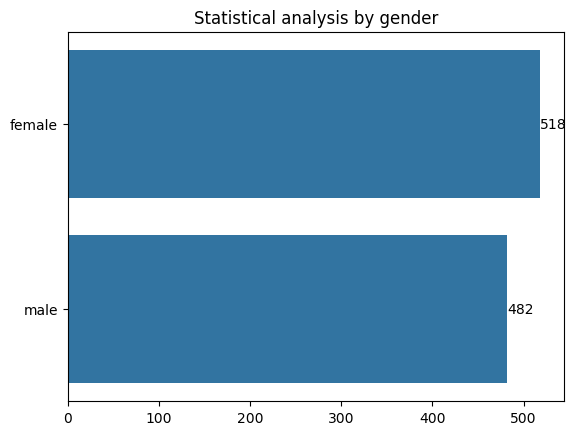

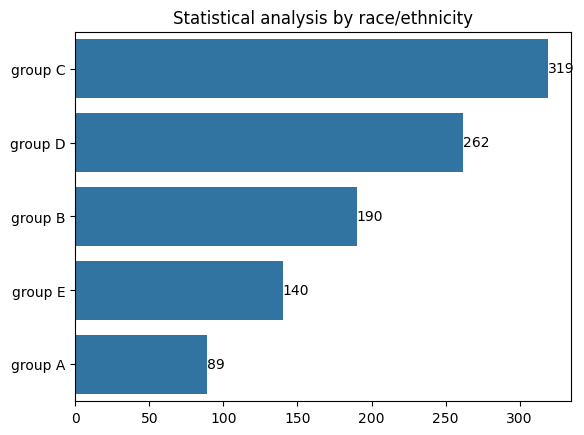

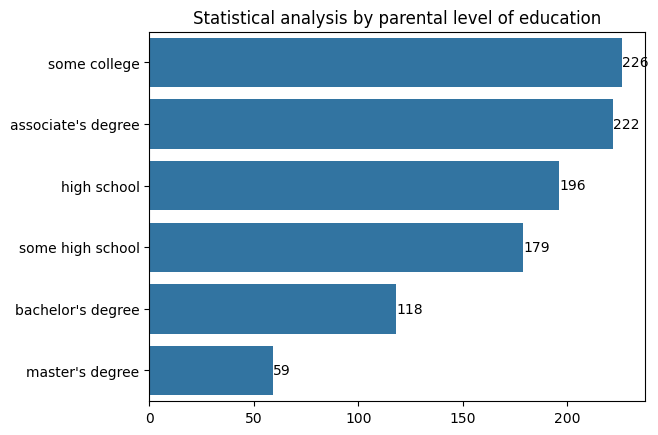

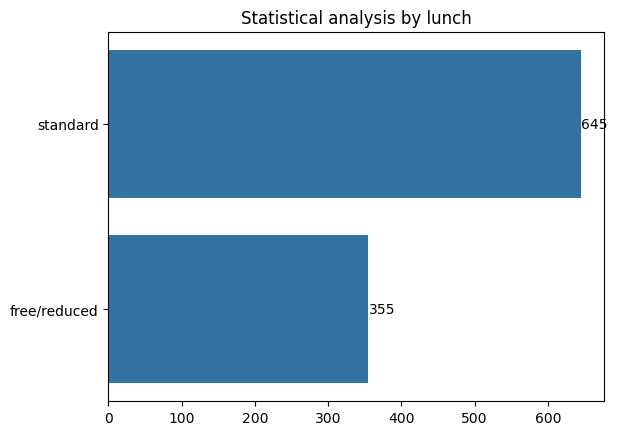

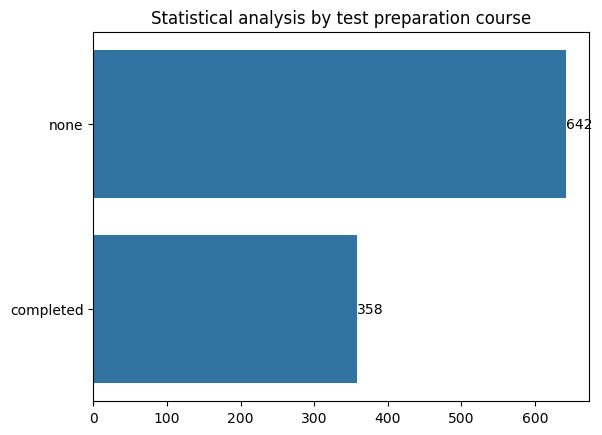

In [66]:
for col in variables:
    plot_barchart(dataset, col)

In [67]:
# Pie chart for relative frequencies

def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

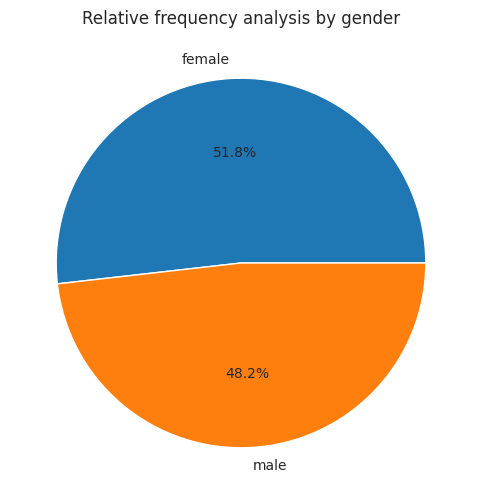

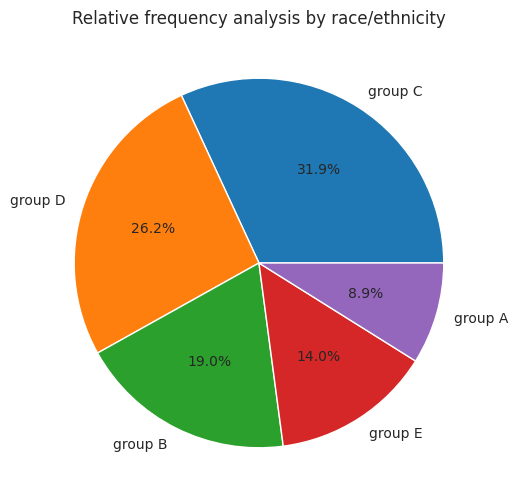

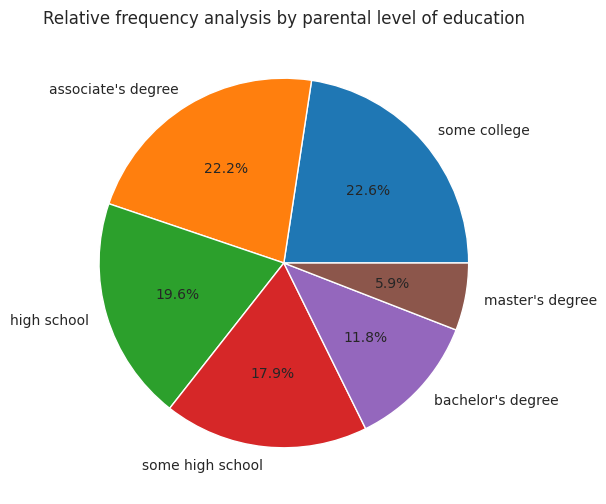

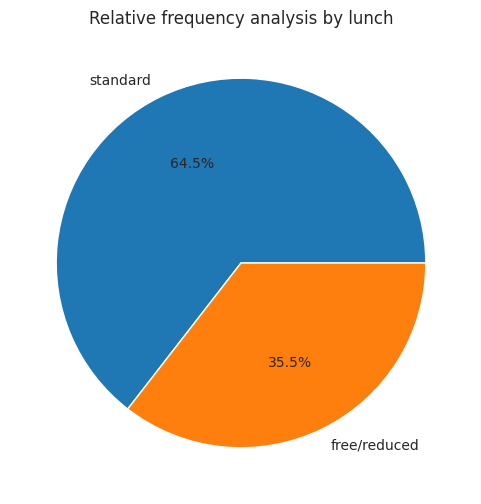

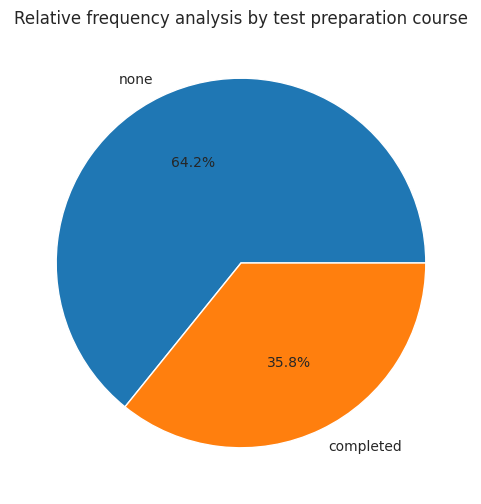

In [68]:
for col in variables:
    plot_piechart(dataset, col)

In [69]:
"5. Statistical Analysis for subgroups"

'5. Statistical Analysis for subgroups'

In [75]:
group01 = dataset.groupby(['gender', 'race/ethnicity']).size().reset_index(name = "samples")
print(group01)

   gender race/ethnicity  samples
0  female        group A       36
1  female        group B      104
2  female        group C      180
3  female        group D      129
4  female        group E       69
5    male        group A       53
6    male        group B       86
7    male        group C      139
8    male        group D      133
9    male        group E       71


In [76]:
top10_group01 = group01.nlargest(10, "samples")

others_group01 = group01[~group01.index.isin(top10_group01.index)]["samples"].sum()
others_row = pd.DataFrame({
    "gender": ["Others"],
    "race/ethnicity": ["Others"],
    "samples": [others_group01]
})

final_group01 = pd.concat([top10_group01, others_row], ignore_index=True)

print(final_group01)

    gender race/ethnicity  samples
0   female        group C      180
1     male        group C      139
2     male        group D      133
3   female        group D      129
4   female        group B      104
5     male        group B       86
6     male        group E       71
7   female        group E       69
8     male        group A       53
9   female        group A       36
10  Others         Others        0


In [77]:
## Absolute frequency analysis

def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel(g1)
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies')
    plt.tight_layout()
    plt.show()

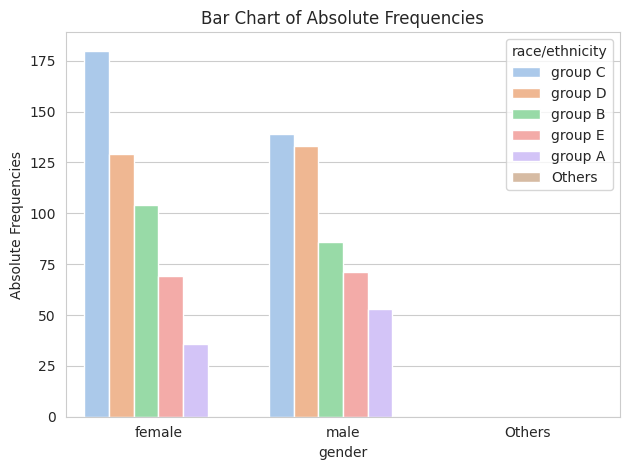

In [78]:
plot_absfreq_groups(final_group01, 'gender', 'race/ethnicity')

In [79]:
## Relative frequency analysis

def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with " + group[g2] + " condition"
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies')
    plt.show()

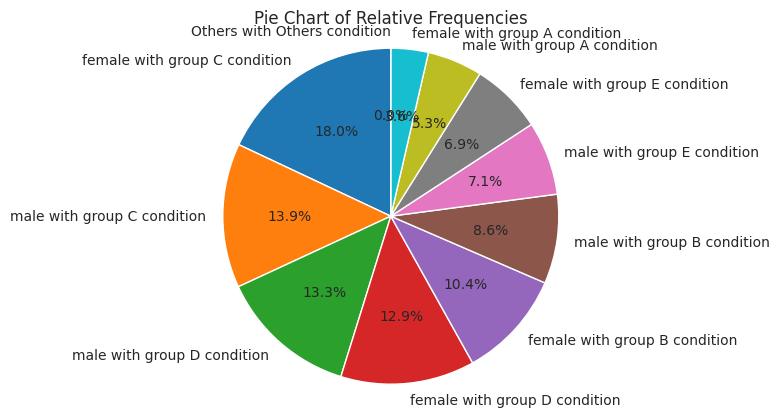

In [80]:
plot_relfreq_groups(final_group01, 'gender', 'race/ethnicity')